# Airbnb Business Analysis


### Development Team Project: Python notebook



<a id = "table-of-content"></a>
# Table of Contents

- [Business Understanding](#business_undestanding)
- [Data Pre-processing](#data_preprocessing)
- [Exploratory Data Analysis](#exploratory_data_analysis)
- [Statistical Analysis](#statistical_analysis)
- [Modelling and Evaluation](#modelling_n_evaluation)
- [Conclusion](#conclusion)

<a id = "business_undestanding"></a>
# 1. Business Understanding

Business Analytical Question - What are the key determinants of pricing for Airbnb listings in NYC? How do factors like location, property type, and reviews influence the price?

### Initial Data Inspection
To start understanding our dataset, we will:

1. **Load the dataset** 
2. **Examine the structure** 
3. **Get a statistical summary** 
4. **Check the dataset size**

These steps are crucial for gaining an initial understanding of the dataset's characteristics, guiding further analysis and preprocessing.


In [1]:
#import data manipulation, visualisation and machine learning libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.graph_objects as go

%matplotlib inline
# Set the aesthetics for the plots
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:

#read data and view summary statistics of numerical variables
df = pd.read_csv('AB_NYC_2019.csv')
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [3]:
#inspect data
df.head() 

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
#number of rows and columns
df.shape

(48895, 16)

In [5]:
#column names
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
#check data types
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# 2. Data Pre-processing

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [8]:
#replacing all NaN values in 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace=True)

In [9]:
#There are a small number of rows where price is registered as 0. These rows are being removed on the assumption that a listing being offered for free is highly improbable.
print(df[df['price'] <= 0].size)
# Drop rows where the price is 0
df = df[df['price'] != 0]

176


In [10]:
#checking 
missing_values = df.isnull().sum()
print(missing_values)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10051
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [11]:
#check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [12]:
#Inspecting categorical variables, starting with count of neighbourhood groups
df.neighbourhood_group.value_counts()

Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [13]:
#Inspecting counts of neighbourhoods and length
df.neighbourhood.value_counts()

Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
                      ... 
Richmondtown             1
New Dorp                 1
Rossville                1
Woodrow                  1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [14]:
#Inspecting counts of room types
df.room_type.value_counts()

Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64

<a id = "exploratory_data_analysis"></a>
# 3. Exploratory Data Analysis
EDA is a critical step in the data science process, focusing on investigating and summarising the main characteristics of a dataset.

We will try and look at the distribution of the columns below but also their relationship with price. 

* host_id
* neighbourhood_group
* neighbourhood 
* latitude 
* longitude 
* room_type 
* price
* number_of_reviews 



## Univariate

### Price

In [15]:
# Calculate summary statistics for price
price_description = df['price'].describe()

price_description


count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

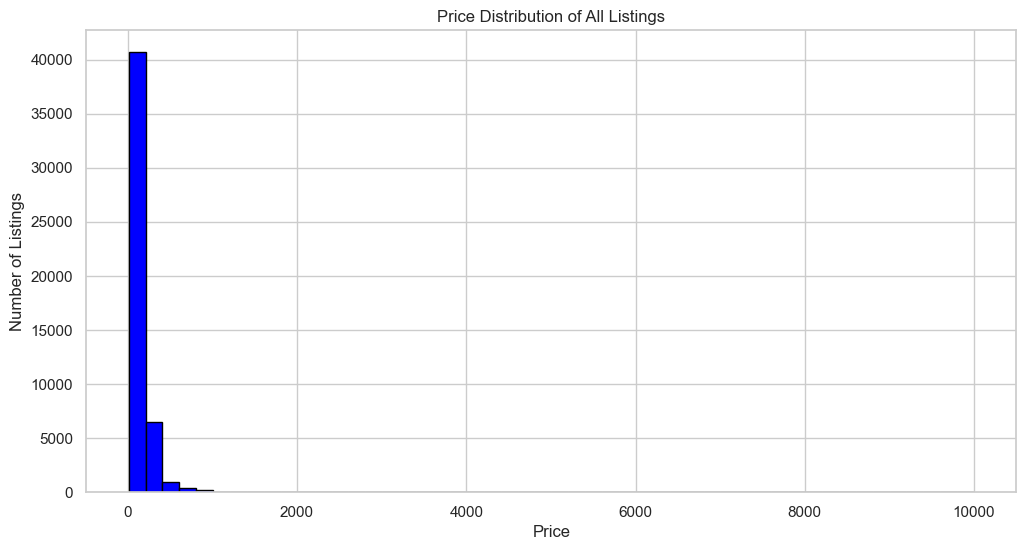

In [16]:
#Distribution of prices
plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=50, color='blue', edgecolor='black')
plt.title('Price Distribution of All Listings')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.show()


From the summary statistics and distribution analysis, it's evident that there are extreme outliers in the dataset. While the average value is around 152, there are instances with values as high as 10,000. To address this, we need to either standardize or cap these extreme values. First, let's determine the count of these outliers, which will help us decide the best course of action.


In [17]:
# Count how many price values are above $500 and see what proportion this is to total dataset. 
extreme_count = df[df['price'] > 500]['price'].count()
print("Number of listings with price over $500:", extreme_count)
total_count = df.shape[0]
# Proportion of listings over £500
proportion = extreme_count / total_count
print("Proportion of listings with price over $500:", proportion)


Number of listings with price over $500: 1044
Proportion of listings with price over $500: 0.02135668112265772


Our analysis reveals that only 2% of the values exceed $500. To prevent these outliers from skewing our analysis, we have decided to cap the price at $500. This approach will ensure a more accurate representation of the dataset's overall trends and characteristics.

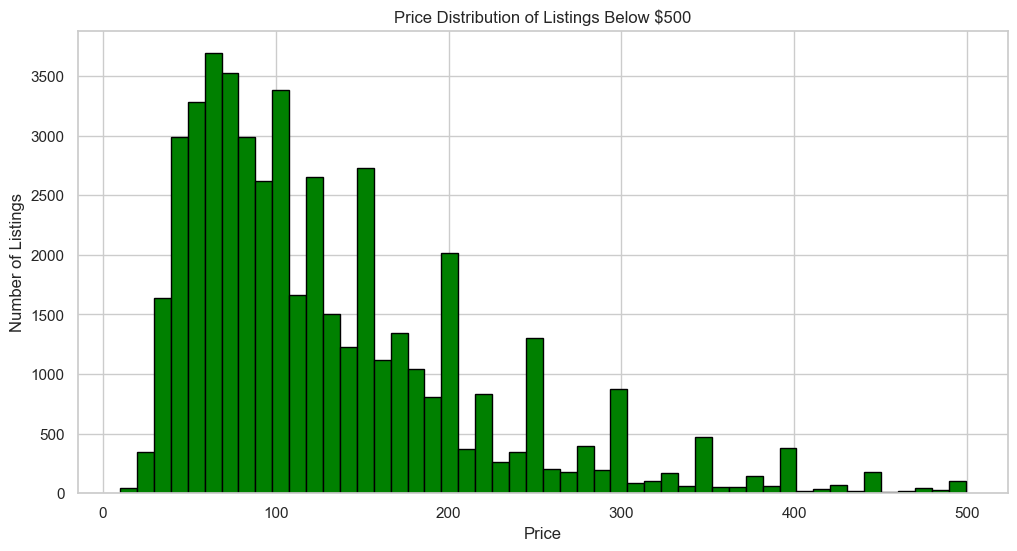

In [18]:
#Distribution of prices below $500
plt.figure(figsize=(12, 6))
plt.hist(df[df['price'] < 500]['price'], bins=50, color='green', edgecolor='black')
plt.title('Price Distribution of Listings Below $500')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.show()


### Host ID

In [19]:
#Looking at the top 10 hosts with most listings.
top_hosts = df.host_id.value_counts().head(10)
top_hosts

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

### Neighbourhood Groups

In [20]:
#Count occurence of each Neighbourhood group
neighbourhood_counts = df['neighbourhood_group'].value_counts()
neighbourhood_counts


Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

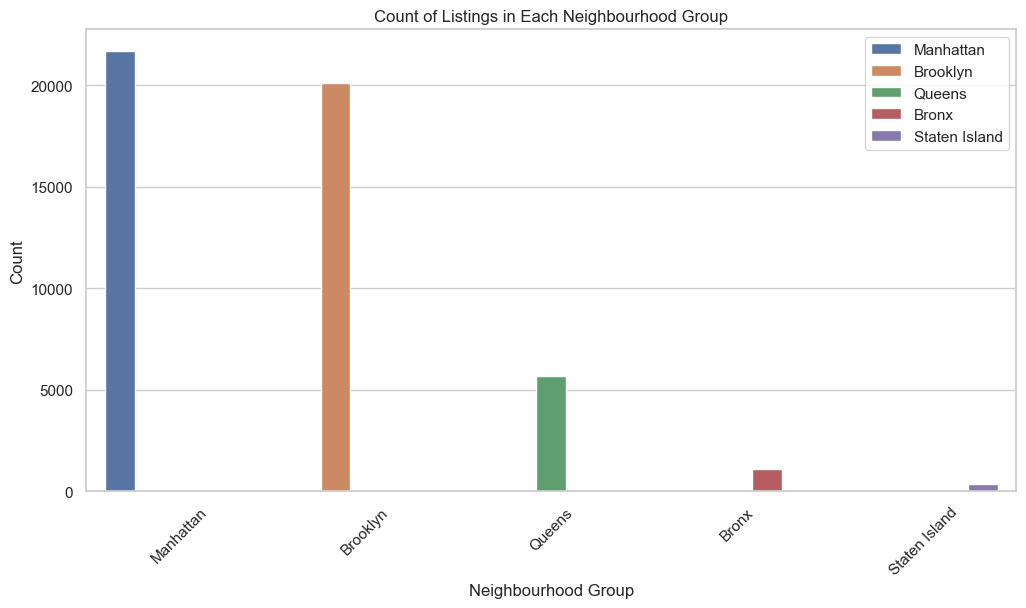

In [21]:
#Visualising counts of listings in each neighbourhood group
plt.figure(figsize=(12, 6))  
sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts.values, hue=neighbourhood_counts.index, palette='deep')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Count of Listings in Each Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Filter dataset for each neighbourhood group and calculate summary statistics for price.
neighbourhood_groups = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
stat_df_list = []

for group in neighbourhood_groups:
    price_data = df[df['neighbourhood_group'] == group]['price']
    summary = price_data.describe(percentiles=[.25, .50, .75]).iloc[3:]
    summary.name = group  # Name the Series with the group name
    stat_df_list.append(summary)

# Combine the summaries into a single Dataframe
stat_df = pd.concat(stat_df_list, axis=1)
stat_df

Brooklyn  Manhattan   Queens  Staten Island   Bronx
min      10.0       10.0     10.0           13.0    10.0
25%      60.0       95.0     50.0           50.0    45.0
50%      90.0      150.0     75.0           75.0    65.0
75%     150.0      220.0    110.0          110.0    99.0
max   10000.0    10000.0  10000.0         5000.0  2500.0

In [23]:
# We want to plot the boxplots of price distribution, as can be seen above their are extreme values so we will remove these in the visualisation and focus on listings below $500.

# Creating a sub-dataframe with prices less than $500
filtered_df = df[df.price < 500]

### Neighbourhood

In [24]:
#Top 10 neighbourhoods with most listings
top_neighbourhoods = df.neighbourhood.value_counts().head(10)
top_neighbourhoods


Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

### Room Type

Text(0.5, 1.0, 'Count of Room Types')

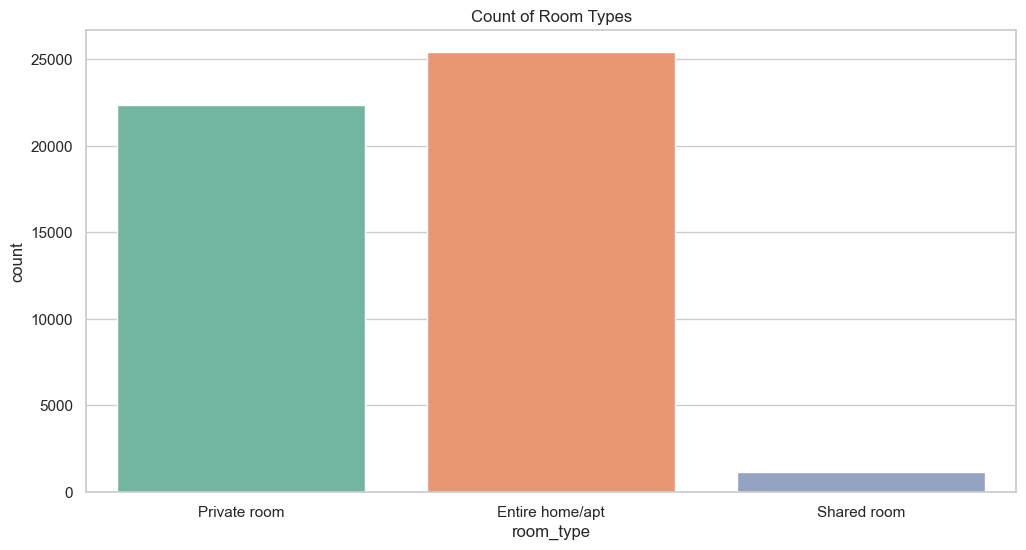

In [25]:
#Counts of different room types
plt.figure(figsize=(12,6))
sns.countplot(x="room_type", data=df, palette = 'Set2')
plt.title( 'Count of Room Types')

### Location

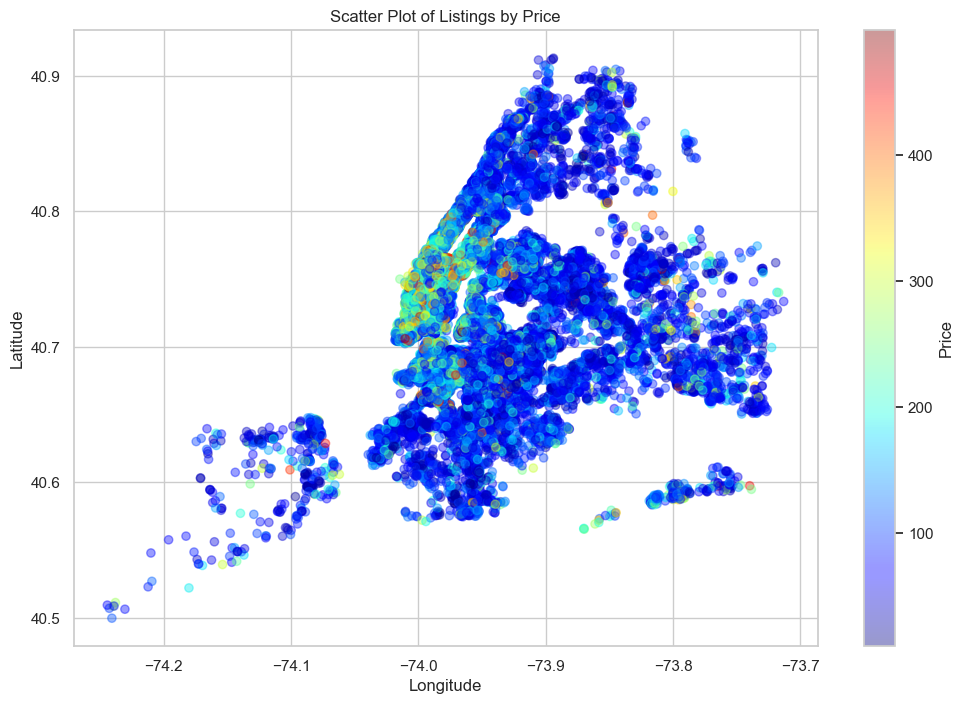

In [26]:
#Examining how price differes around longitutde and lattitude
# Create a figure for the scatter plot
plt.figure(figsize=(12, 8))

# Creating the scatter plot
# 'c' is used for color mapping based on the 'price' column
scatter = plt.scatter(filtered_df['longitude'], filtered_df['latitude'], 
                      c=filtered_df['price'], cmap='jet', alpha=0.4)

# Adding a colorbar to represent the price
plt.colorbar(scatter, label='Price')

# Adding labels and title to the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Listings by Price')

# Displaying the plot
plt.show()

### Number of Reviews

In [27]:
#Listings with most reviews
top_reviewed_listings=df.nlargest(10,'number_of_reviews')
top_reviewed_listings

id                                               name   host_id  \
11759   9145202                            Room near JFK Queen Bed  47621202   
2031     903972                         Great Bedroom in Manhattan   4734398   
2030     903947                     Beautiful Bedroom in Manhattan   4734398   
2015     891117                       Private Bedroom in Manhattan   4734398   
13495  10101135                            Room Near JFK Twin Beds  47621202   
10623   8168619                  Steps away from Laguardia airport  37312959   
1879     834190           Manhattan Lux Loft.Like.Love.Lots.Look !   2369681   
20403  16276632  Cozy Room Family Home LGA Airport NO CLEANING FEE  26432133   
4870    3474320                 Private brownstone studio Brooklyn  12949460   
471      166172                    LG Private Room/Family Friendly    792159   

      host_name neighbourhood_group    neighbourhood  latitude  longitude  \
11759      Dona              Queens          Jamaica  40.66730  -73.76831   
2031         Jj           Manhattan           Harlem  40.82085  -73.94025   
2030         Jj           Manhattan           Harlem  40.82124  -73.93838   
2015         Jj           Manhattan           Harlem  40.82264  -73.94041   
13495      Dona              Queens          Jamaica  40.66939  -73.76975   
10623      Maya              Queens    East Elmhurst  40.77006  -73.87683   
1879      Carol           Manhattan  Lower East Side  40.71921  -73.99116   
20403  Danielle              Queens    East Elmhurst  40.76335  -73.87007   
4870        Asa            Brooklyn       Park Slope  40.67926  -73.97711   
471       Wanda            Brooklyn         Bushwick  40.70283  -73.92131   

             room_type  price  minimum_nights  number_of_reviews last_review  \
11759     Private room     47               1                629  2019-07-05   
2031      Private room     49               1                607  2019-06-21   
2030      Private room     49               1                597  2019-06-23   
2015      Private room     49               1                594  2019-06-15   
13495     Private room     47               1                576  2019-06-27   
10623     Private room     46               1                543  2019-07-01   
1879      Private room     99               2                540  2019-07-06   
20403     Private room     48               1                510  2019-07-06   
4870   Entire home/apt    160               1                488  2019-07-01   
471       Private room     60               3                480  2019-07-07   

       reviews_per_month  calculated_host_listings_count  availability_365  
11759              14.58                               2               333  
2031                7.75                               3               293  
2030                7.72                               3               342  
2015                7.57                               3               339  
13495              13.40                               2               173  
10623              11.59                               5               163  
1879                6.95                               1               179  
20403              16.22                               5               341  
4870                8.14                               1               269  
471                 6.70                               1                 0

In [28]:
#Average price per night for most reviewed listings
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


## Last Review

In [29]:
layout = go.Layout(
    title='',
#     xaxis=dict(title='Words'),
    yaxis=dict(title='Frequency'),
    margin=go.layout.Margin(l=50, r=50, t=50, b=100)  # Adjust margins to fit labels
)
fig = go.Figure(data=go.Violin(y=df['reviews_per_month'], box_visible=True, 
                               meanline_visible=True, x0='Reviews per Month'), layout=layout)
fig.update_layout(title_text='Violin Plot of Last Review', title_x=0.5)
fig.show()

### Calculated Host Listings Count

In [30]:
fig = go.Figure(data=go.Violin(y=df['calculated_host_listings_count'], box_visible=True, 
                               meanline_visible=True, x0='Calculated Host Listings Count'))
fig.update_layout(title_text='Violin Plot of Calculated Host Listings Count', title_x=0.5)
fig.show()

### Availability 365
The distribution is positively skewed and the kurtosis is platykurtic meaning there are a few extreme outliers. The values are greater than the mean.

In [31]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
data_skewness = skew(df['availability_365'])
data_kurtosis = kurtosis(df['availability_365'])

# Print the results
print(f"Skewness: {data_skewness}")
print(f"Kurtosis: {data_kurtosis}")

Skewness: 0.7634304168421344
Kurtosis: -0.9975865821987906


In [32]:
fig = go.Figure(data=go.Violin(y=df['availability_365'], box_visible=True, meanline_visible=True, 
                               x0='Availability 365'))
fig.update_layout(title_text='Violin Plot of Availability_365', title_x=0.5)
fig.show()

### Name
It looks like the most widely used descriptions of the airbnbs are private and room and locations of the airbnbs. Oddly the word 'heart' appears in the neme column a number of times. Some samples in the data frame show how the word in used; it is used to show that the airbnb is centrally located in the neighbourhood.

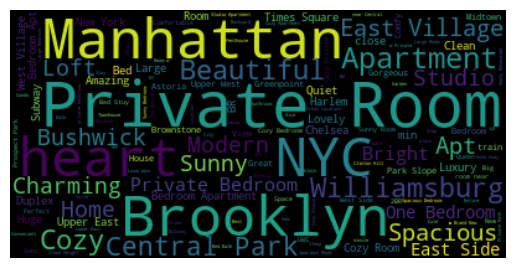

In [33]:
from wordcloud import WordCloud

text = ' '.join(df['name'].astype(str))
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
# Filter the DataFrame to get rows where the word 'heart' is mentioned in the 'name' column
heart_df = df[df['name'].str.contains('heart', case=False, na=False)]
heart_df

id                                               name    host_id  \
66        16458  Light-filled 2B duplex in the heart of Park Sl...      64056   
202       54158                The Institute—Heart of Williamsburg      10889   
253       62903  Beautiful modern studio apartment in heart of NYC     306605   
272       64707  Amazing  Sunny & Breezy Home In the Heart of  NYC       7310   
341       84659                Large Studio--Heart of East Village     462776   
...         ...                                                ...        ...   
48785  36426720  Crash at a sofabed.Unique apt In the heart of NYC   67738361   
48794  36428255  Skyscraper Ultimate Luxury at the Heart of BKLYN.  148289089   
48823  36449052   Lovely private room in the heart of Williamsburg  173021064   
48884  36482783        Brooklyn Oasis in the heart of Williamsburg  274307600   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen   68119814   

        host_name neighbourhood_group   neighbourhood  latitude  longitude  \
66           Sara            Brooklyn      Park Slope  40.67343  -73.98338   
202           Bob            Brooklyn    Williamsburg  40.71950  -73.95976   
253        Daniel           Manhattan         Chelsea  40.74238  -73.99567   
272         Tilly           Manhattan    Little Italy  40.71702  -73.99811   
341          Kyle           Manhattan    East Village  40.72843  -73.98895   
...           ...                 ...             ...       ...        ...   
48785       Julie           Manhattan  Hell's Kitchen  40.75579  -73.99094   
48794       Elmar            Brooklyn     Boerum Hill  40.68780  -73.98145   
48823       Katie            Brooklyn    Williamsburg  40.71052  -73.95149   
48884    Jonathan            Brooklyn    Williamsburg  40.71790  -73.96238   
48894  Christophe           Manhattan  Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews last_review  \
66     Entire home/apt    225               3                  4  2017-09-24   
202    Entire home/apt    249               2                358  2019-06-20   
253    Entire home/apt    205               9                 62  2019-06-21   
272    Entire home/apt     90              14                  1  2019-01-02   
341    Entire home/apt    139               1                388  2019-06-26   
...                ...    ...             ...                ...         ...   
48785      Shared room    260               1                  0         NaN   
48794  Entire home/apt    235              10                  0         NaN   
48823     Private room     60               2                  0         NaN   
48884     Private room    190               7                  0         NaN   
48894     Private room     90               7                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
66                  0.16                               1                 0  
202                 3.44                               2               164  
253                 0.70                               2                76  
272                 0.16                               1                14  
341                 3.88                               1               142  
...                  ...                             ...               ...  
48785               0.00                               2               168  
48794               0.00                               1                64  
48823               0.00                               2               134  
48884               0.00                               1               341  
48894               0.00                               1                23  

[2083 rows x 16 columns]

In [35]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Extract word frequencies
word_frequencies = wordcloud.words_

# Sort the frequencies in descending order
sorted_frequencies = sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)

# Select the top 20 words
top_20_words = sorted_frequencies[:20]

# Unzip the words and frequencies into separate lists
words, frequencies = zip(*top_20_words)

# Create the bar graph
data = [go.Bar(
    x=words,
    y=frequencies
)]

# Create the layout
layout = go.Layout(
    title='Top 20 Words Used in the Name Column',
    xaxis=dict(title='Words'),
    yaxis=dict(title='Frequency'),
    margin=go.layout.Margin(l=50, r=50, t=50, b=100)  # Adjust margins to fit labels
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the figure in the notebook
iplot(fig)

## Bivariate Analysis

### Location and Price

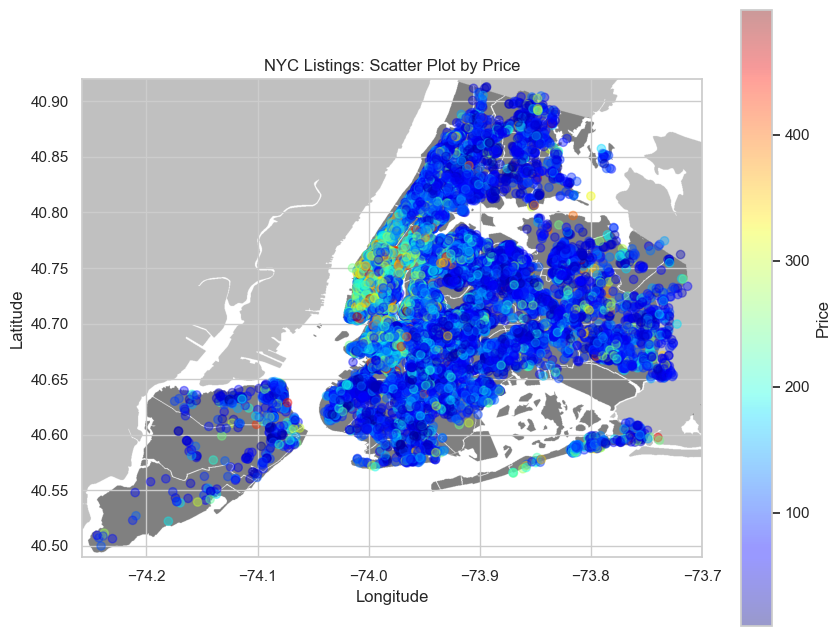

In [36]:
#Mapping scatter graph onto a map of New York
import urllib.request

# URL of the image
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'

# Download the image and save it locally
file_path = 'nyc_map.png'
urllib.request.urlretrieve(url, file_path)

# Loading the NYC image from the saved file
nyc_img = plt.imread(file_path)

# Create a figure
plt.figure(figsize=(10, 8))

# Display the image
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])

# Creating the scatter plot
scatter = plt.scatter(filtered_df['longitude'], filtered_df['latitude'], c=filtered_df['price'],
                      cmap='jet', alpha=0.4, zorder=5)

# Adding a colorbar for the price
plt.colorbar(scatter, label='Price')

# Adding labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Listings: Scatter Plot by Price')

# Display the plot
plt.show()


### Nighbourhood Group and Price

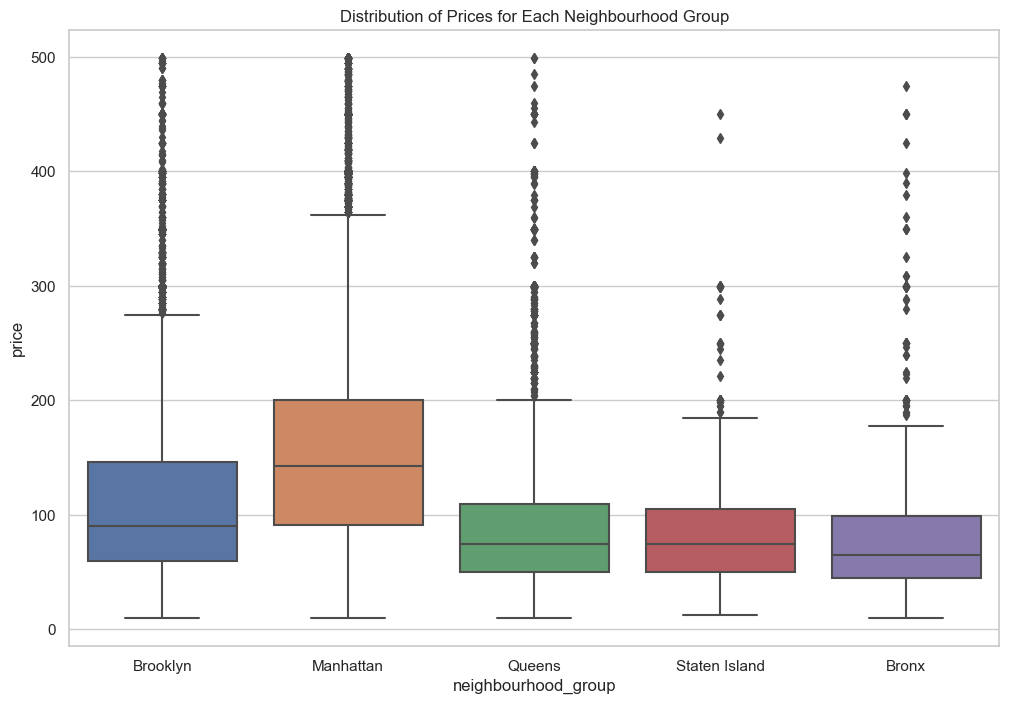

In [37]:
# Using boxplot to showcase the distribution of prices by neighbourhood group
plt.figure(figsize=(12, 8))
price_dist = sns.boxplot(data=filtered_df, x='neighbourhood_group', y='price', palette='deep')  # You can choose any palette like 'viridis', 'Set2', 'rainbow', etc.
price_dist.set_title('Distribution of Prices for Each Neighbourhood Group')
plt.show()


### Neighbourhood and Price

In [38]:
#Average price of neighbourhoods with most listings
top_neighbourhoods = top_neighbourhoods.index
avg_price_per_neighbourhood = df[df['neighbourhood'].isin(top_neighbourhoods)].groupby('neighbourhood')['price'].mean()
avg_price_per_neighbourhood


neighbourhood
Bedford-Stuyvesant    107.794340
Bushwick               84.903737
Crown Heights         112.480179
East Village          186.083108
Harlem                118.974041
Hell's Kitchen        204.794178
Midtown               282.719094
Upper East Side       188.948276
Upper West Side       210.918316
Williamsburg          143.839500
Name: price, dtype: float64

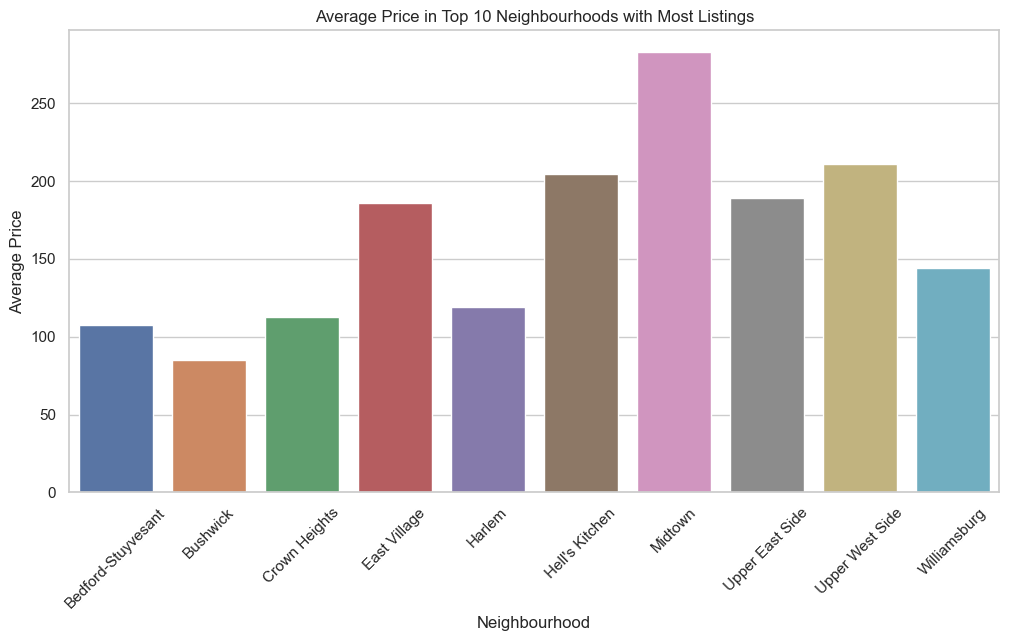

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_neighbourhood.index, y=avg_price_per_neighbourhood.values, palette= 'deep')
plt.xticks(rotation=45)
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title('Average Price in Top 10 Neighbourhoods with Most Listings')
plt.show()

### Room Type and Price

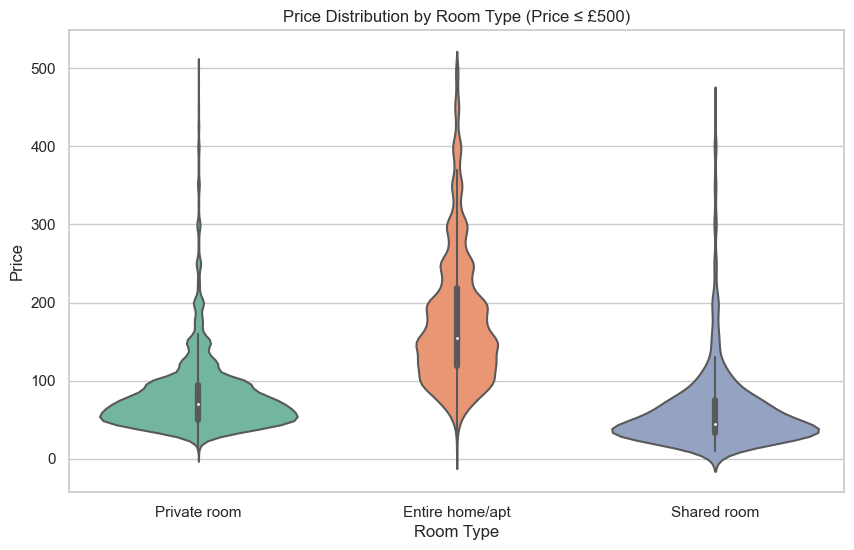

In [40]:
#Violin plot to show distribution of prices by room type
plt.figure(figsize=(10, 6))
sns.violinplot(x='room_type', y='price', data=filtered_df, palette = 'Set2')
plt.title('Price Distribution by Room Type (Price ≤ £500)')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

### Number of Reviews and Price

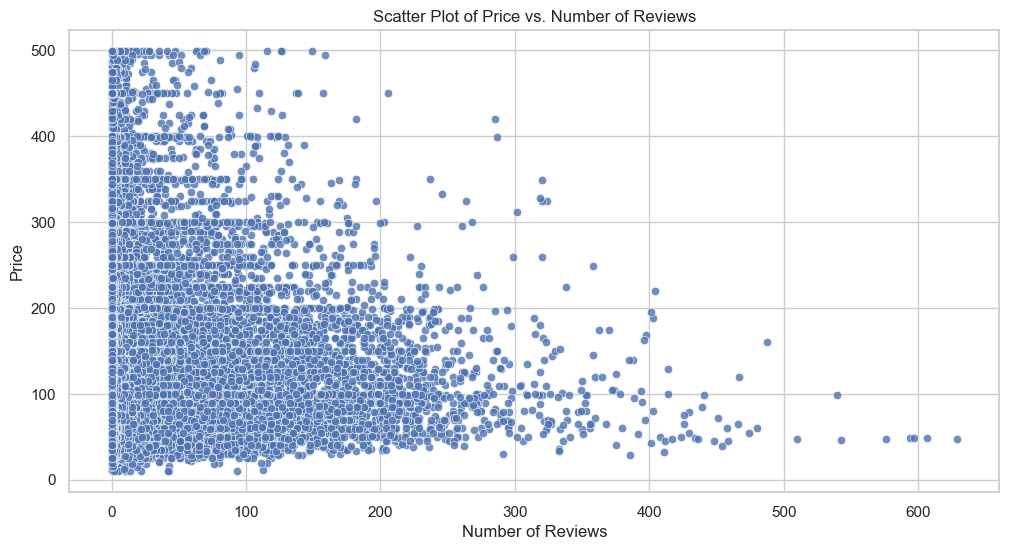

In [41]:
# Scatter plot number of reviews vs price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=filtered_df, alpha = 0.8)
plt.title('Scatter Plot of Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

### Correlation heatmap for continuous variables

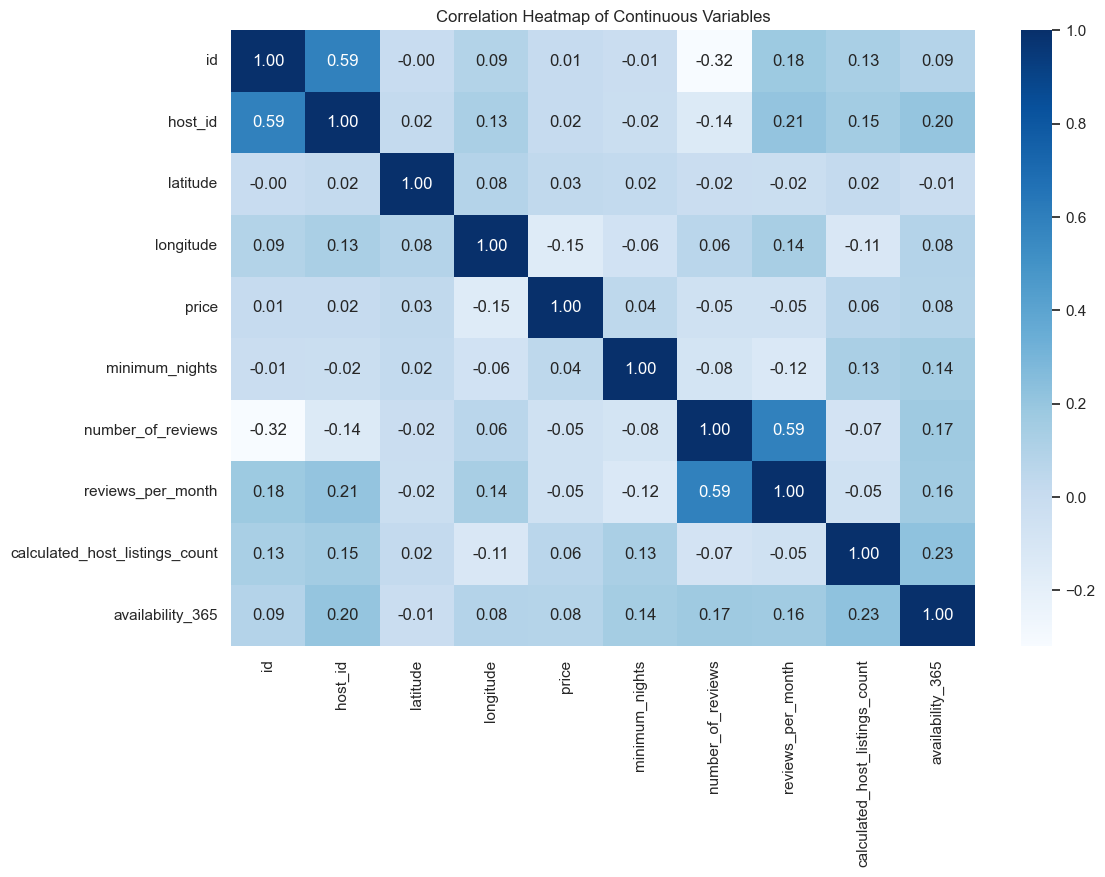

In [42]:
# Selecting only continuous (numerical) variables
continuous_vars = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = continuous_vars.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()

In [43]:
#Dropping id, host_name and last_review columns as we will not be using these.
df.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace =True)

# 4. Modelling 

K-means Clustering

In [44]:
# Separating continuous and categorical data
continuous_features = filtered_df[['latitude', 'longitude', 'price', 'number_of_reviews', 'availability_365']]
categorical_features = filtered_df[['neighbourhood_group', 'room_type']]

# Standardizing the continuous features
scaler = StandardScaler()
continuous_features_scaled = scaler.fit_transform(continuous_features)

# One-hot encoding the categorical features
encoder = OneHotEncoder(sparse=False)
categorical_features_encoded = encoder.fit_transform(categorical_features)

# Combining processed continuous and categorical data
processed_data = np.hstack((continuous_features_scaled, categorical_features_encoded))

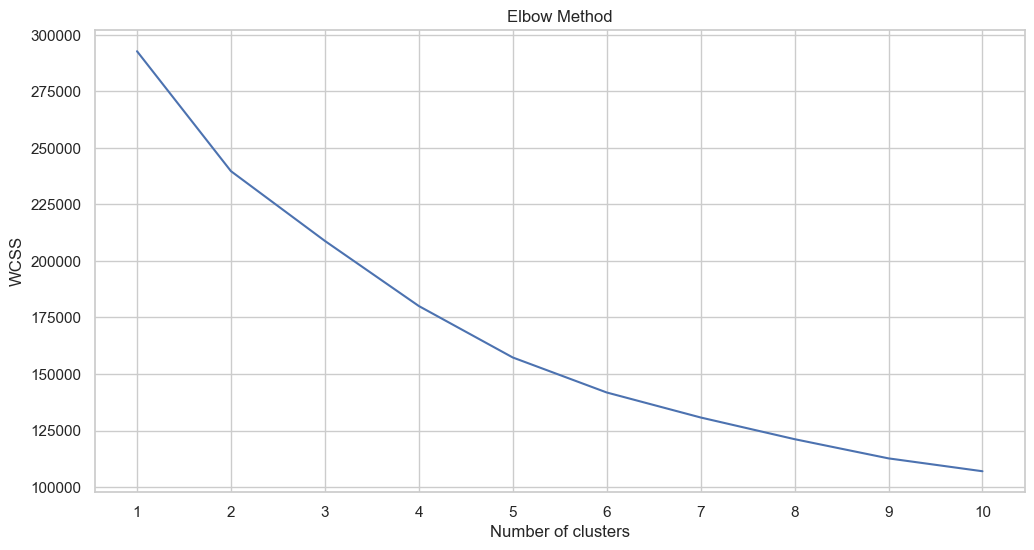

In [45]:
#Using elbow method to determine the best value for k (how many clusters) in k means clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(processed_data)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(range(1, 11))
plt.ylabel('WCSS')
plt.show()

As can be seen from above, the curve is steepest from 1 to 2 so 2 would be the opitmal number for clusters. 

In [46]:
# After determining the optimal number of clusters from the plot, assign it to k and fit model
k = 2  

kmeans_final = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans_final.fit(processed_data)

# Cluster labels
cluster_labels = kmeans_final.labels_

# Retrieve the centroids
centroids = kmeans_final.cluster_centers_

all_feature_names = continuous_features.columns.tolist() + encoder.get_feature_names_out().tolist()
centroids_df = pd.DataFrame(centroids, columns=all_feature_names)
print("Centroids of Clusters:\n", centroids_df)

# Adding cluster labels to your original DataFrame
filtered_df.loc[:, 'Cluster'] = cluster_labels




Centroids of Clusters:
    latitude  longitude     price  number_of_reviews  availability_365  \
0  0.684660  -0.367397  0.408314          -0.054974          0.007263   
1 -0.669288   0.359148 -0.399146           0.053740         -0.007100   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                   0.043644                      0.043220   
1                   0.002200                      0.780162   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                       0.880105                    0.030908   
1                       0.001038                    0.203445   

   neighbourhood_group_Staten Island  room_type_Entire home/apt  \
0                           0.002123                   0.614333   
1                           0.013156                   0.410334   

   room_type_Private room  room_type_Shared room  
0                0.362911               0.022756  
1                0.564308               0.025358  


/var/folders/pd/5gs7sh_15890338f6zrthr940000gn/T/ipykernel_37584/1808824093.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
# Calculate average price for each cluster
average_price_per_cluster = filtered_df.groupby('Cluster')['price'].mean()
print("Average Price per Cluster:\n", average_price_per_cluster)

# Calculate other statistics like average number of reviews per cluster
average_reviews_per_cluster = filtered_df.groupby('Cluster')['number_of_reviews'].mean()
print("\nAverage Number of Reviews per Cluster:\n", average_reviews_per_cluster)

# Calculate average availability for each cluster
average_availability_per_cluster = filtered_df.groupby('Cluster')['availability_365'].mean()
print("Average Availability per Cluster (in days):\n", average_availability_per_cluster)



Average Price per Cluster:
 Cluster
0    164.880430
1     96.077268
Name: price, dtype: float64

Average Number of Reviews per Cluster:
 Cluster
0    21.097448
1    26.028924
Name: number_of_reviews, dtype: float64
Average Availability per Cluster (in days):
 Cluster
0    111.920980
1    110.133082
Name: availability_365, dtype: float64


In [48]:

# Most common room type per cluster
most_common_room_type = filtered_df.groupby('Cluster')['room_type'].agg(lambda x: x.value_counts().index[0])
print("\nMost Common Room Type per Cluster:\n", most_common_room_type)

# Most common neighbourhood per cluster
#most_common_neighbourhood = filtered_df.groupby('Cluster')['neighbourhood'].agg(lambda x: x.value_counts().index[0])
#print("\nMost Common Neighbourhood per Cluster:\n", most_common_neighbourhood)




Most Common Room Type per Cluster:
 Cluster
0    Entire home/apt
1       Private room
Name: room_type, dtype: object


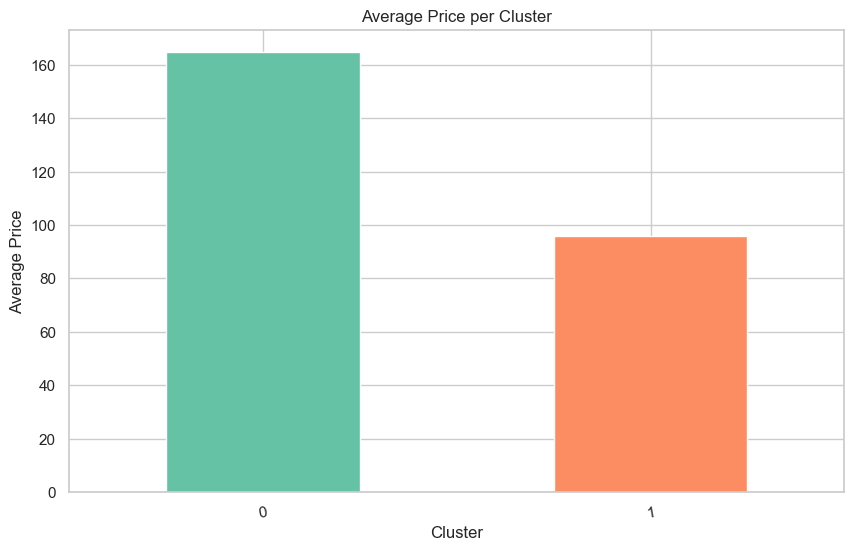

In [49]:
# Setting the size of the plot
plt.figure(figsize=(10, 6))  # You can adjust the dimensions as needed

# Plotting the average price per cluster with a color palette
palette = plt.get_cmap('Set2')  # This is an example palette, you can choose others
average_price_per_cluster.plot(kind='bar', color=[palette(i) for i in range(len(average_price_per_cluster))])

# Setting the title and labels
plt.title('Average Price per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Price')

# Rotating x-axis labels for better readability
plt.xticks(rotation=10)  # Rotates labels by 45 degrees

# Display the plot
plt.show()


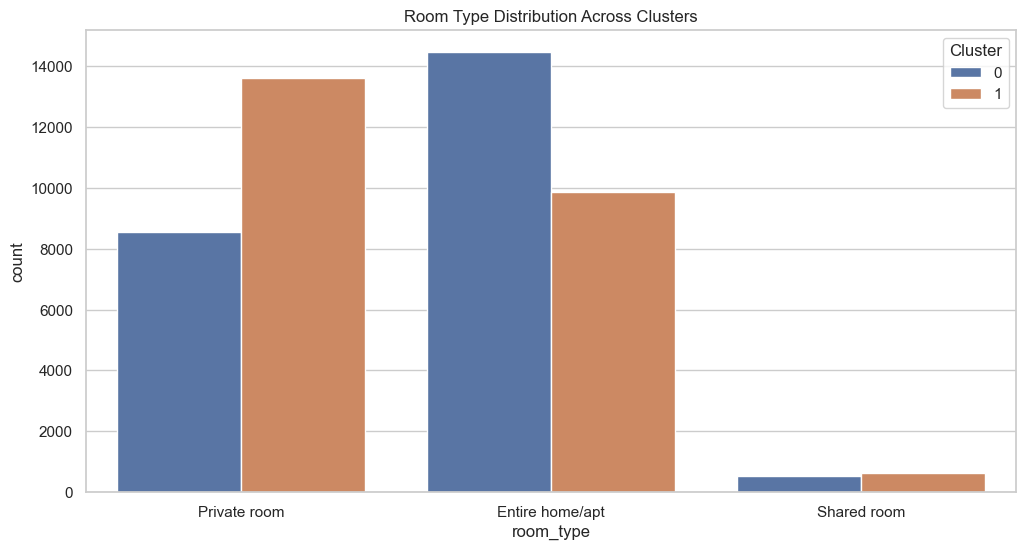

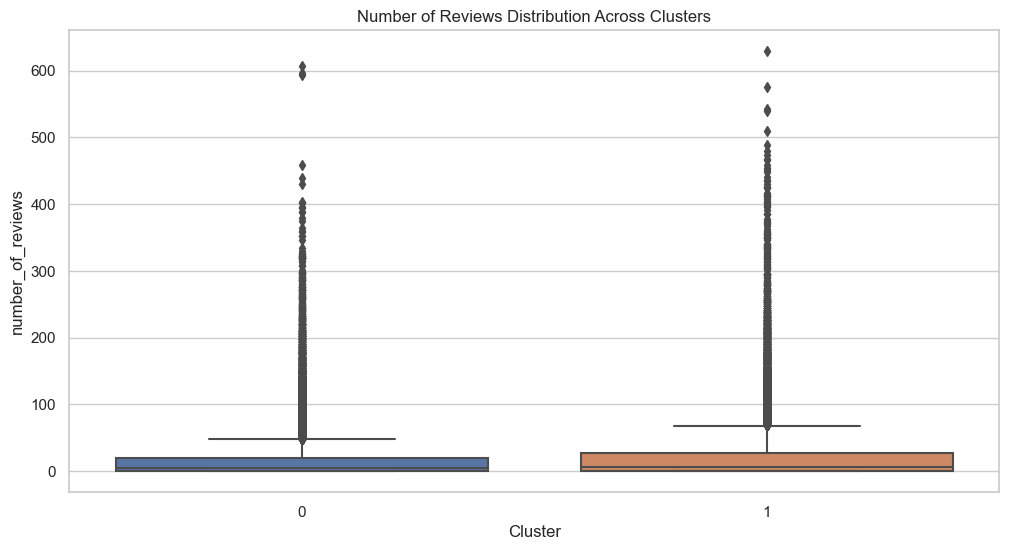

In [50]:
# Compare room types between clusters
plt.figure(figsize=(12,6))
sns.countplot(x='room_type', hue='Cluster', data=filtered_df)
plt.title('Room Type Distribution Across Clusters')
plt.show()

# Compare the distribution of number of reviews
plt.figure(figsize=(12,6))
sns.boxplot(x='Cluster', y='number_of_reviews', data=filtered_df)
plt.title('Number of Reviews Distribution Across Clusters')
plt.show()

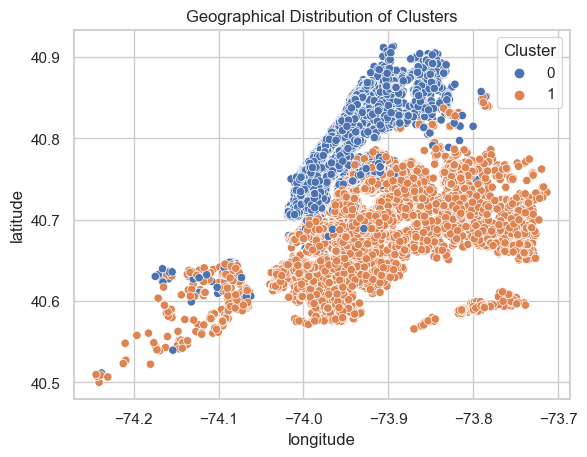

In [51]:
# Geographical distribution (if latitude and longitude are available)
sns.scatterplot(x='longitude', y='latitude', hue='Cluster', data=filtered_df)
plt.title('Geographical Distribution of Clusters')
plt.show()